# APS8 - Regressão e Intervalo de Confiança




**Questão 1**

*(Montgomery 6-1)*

A indústria de *fast food* precisa selecionar materiais biodegradáveis para produzir embalagens mais sustentáveis. É desejável que o material tenha um baixo fator $\kappa$ de condutividade térmico  (medido em W/mK). 

Uma abordagem para diminuir o $\kappa$ é reduzir a densidade do material (medida em $g/cm^3$ )

Assuma que é possível ajustar os dados por um modelo de regressão linear.


| y: Condutividade termal (W/mK)| x: Densidade de produto (g/cm3)|
|---|---|
|0.0480| 0.1750|
|0.0525| 0.2200|
|0.0540| 0.2250|
|0.0535| 0.2260|
|0.0570| 0.2500|
|0.0610| 0.2765|

Linhas separadas:

    condutividade = [0.0480, 0.0525, 0.0540, 0.0535, 0.0570, 0.0610]

    densidade = [0.1750, 0.2200, 0.2250, 0.2260, 0.2500, 0.2765]

Pede-se:

**a.** Estime o modelo de regressão encontrando $\hat{\beta_0}$ e $\hat{\beta_1}$ usandos a fórmula abaixos. 


$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_1} \bar{x}$$

e

$$\hat{\beta_1}= \frac{\sum\limits_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum\limits_{i=1}^{n}(y_{i}-\bar{y})^2} = \frac{S_{xy}}{S_{xx}} $$



**Dica:**  converta as listas em array do numpy. Desta forma **não vai precisar fazer loops.**

    x = np.array(condutividade)
    x_ = np.mean(x)


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, probplot
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\vitor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
def regre(x, y):
    X = sm.add_constant(x)
    model = sm.OLS(y,X)
    result = model.fit()
    return result

In [4]:
condutividade = [0.0480, 0.0525, 0.0540, 0.0535, 0.0570, 0.0610]
densidade = [0.1750, 0.2200, 0.2250, 0.2260, 0.2500, 0.2765]
y = np.array(condutividade)
y_ = np.mean(y)
x = np.array(densidade)
x_ = np.mean(x)


Por exemplo, a linha abaixo calcula $(x_i - \overline{x})^2$ para todo $x_i$ de uma vez:

    (x - x_)**2    


E a linha abaixo calcula $\sum\limits_{i=1}^{n}(x_{i}-\bar{x})$:

    np.sum((x - x_)**2)

In [5]:
Sxx = ((x-x_)**2).sum()
Sxy = ((y-y_)*(x-x_)).sum()

In [6]:
beta1 = (Sxy)/(Sxx)

In [7]:
beta0 = y_ - beta1*x_

In [8]:
print("beta0: {0}".format(beta0))
print("beta1: {0}".format(beta1))

beta0: 0.024933975942238073
beta1: 0.12852178094467875







**b.** Agora use a biblioteca `statsmodels` para encontrar $\hat{\beta_0}$ e $\hat{\beta_1}$. Escreva a equação que estima *Condutividade termal* em função da *Densidade do produto*

**c.** Calcule $SS_E$ (SQRes) e encontre a variância dos resíduos. Veja o formulário que foi fornecido.

$$SQRes=SS_{E}=\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}\epsilon^2_{i}$$





**d.** Demonstre que $SQT = SQRes + SQReg$, ou, em outra notação,  que $SS_T = SS_R + SS_E$ . Ofereça uma explicação sucinta do que são SQT, SQRes e SQReg.

$$SQReg=SS_{R}=(\hat{y}_i-\bar{y})^2$$

$$SQT=SS_{T}=\sum\limits^{n}_{i=1}(y_i-\bar{y})^2$$





**e.**  Calcule o coeficiente de determinação $R^2$ . 

Faça um teste $t$ da significância estatística de $\hat{\beta_0}$ e $\hat{\beta_1}$ para um $\alpha=5\%$ . Deixe claras as hipóteses e forneça os níveis descritivos (*p-values*) dos resultados. 

**Dica:** 

Os valores $P > |t|$ que são dados no resultado da regressão são estes *p-values*

**e.** Para $x = 0.0540$ quanto vale o resíduo do modelo de regressão? Quanto da variação é explicada pela regressão?





In [9]:
#b
re = regre(x, y)
re.summary()

C:\Users\vitor\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     275.8
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           7.70e-05
Time:                        09:59:47   Log-Likelihood:                 37.364
No. Observations:                   6   AIC:                            -70.73
Df Residuals:                       4   BIC:                            -71.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0249      0.002     13.959      0.000       0.020       0.030
x1             0.1285      0.008     16.608      0.000       0.107       0.150
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.411
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.541
Skew:                          -0.191   Prob(JB):                        0.763
Kurtosis:                       1.579   Cond. No.                         34.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#c
e = y - (beta0 + beta1*x)
sse = (e**2).sum()
sse

1.369824338994421e-06

In [11]:
#d
ssr = ((y - y_)**2).sum()
sst = sse + ssr
print(ssr)
print(sst)

9.583333333333332e-05
9.720315767232775e-05


In [12]:
#e
r2 = 1 - (sse/sst)
r2

0.9859076148162583

**Questão 2.**

*(Montgomery 12-9)*

Os dados abaixo são provenientes de uma pesquisa de satisfação aplicada em um hospital (**também estão disponíveis em [um arquivo CSV](tabela_pacientes.csv)**). 

|Observation| Age| Severity| Surg_Med| Anxiety| Satisfaction|
|---|---|---|---|---|---|
|1|55|50| 0| 2.1| 68|
|2|46|24| 1| 2.8| 77|
|3|30|46| 1| 3.3| 96|
|4|35|48| 1| 4.5| 80|
|5|59|58| 0| 2.0| 43|
|6|61|60| 0| 5.1| 44|
|7|74|65| 1| 5.5| 26|
|8|38|42| 1| 3.2| 88|
|9 |27|42| 0| 3.1| 75|
|10|51|50 |1 |2.4 |57 |
|11|53|38 |1 |2.2 |56|
|12|41|30 |0 |2.1 |88|
|13|37|31 |0 |1.9 |88|
|14|24|34 |0 |3.1 |102|
|15|42|30 |0 |3.0 |88|
|16|50|48 |1 |4.2 |70|
|17|58|61 |1 |4.6 |52|
|18|60|71 |1 |5.3 |43|
|19|62|62 |0 |7.2 |46|
|20|68|38 |0 |7.8 |56|
|21|70|41 |1 |7.0 |59|
|22|79|66 |1 |6.2 |26|
|23|63|31 |1 |4.1 |52|
|24|39|42 |0 |3.5 |83|
|25|49|40 |1 |2.1 |75|

As variáveis são:

* `Age` - a idade do paciente
* `Severity` - quão severa é a condição. Valores mais altos indicam condição mais preocupante
* `Surg-Med` - Indica se é um paciente de visita ao médico `0` ou cirurgia `1`
* `Anxiety` - Índice de ansiedade. Valores mais elevados indicam maior ansiedade

Pede-se:

**a.** Encontre um modelo de regressão linear múltipla capaz de prever `Satisfaction` a partir da idade, severidade da condição e índice de ansiedade. Escreva a equação.

**b.** Interprete os valores $P > |t|$ e a $Prob(\text{F-statistic})$ indique o que dizem a respeito da qualidade da regressão. Qual a hipótese nula que cada um testa?

**c.** Por que é preciso supor que os resíduos do modelo de regressão seguem uma distribuição normal?

**d.** O que dizem os testes $Pr(Omnibus)$ e $Pr(JB)$ sobre a normalidade dos resíduos neste caso?



In [13]:
#a
dados = pd.read_csv('tabela_pacientes.csv')

In [14]:
quant = ['Age','Anxiety', 'Severity']
quant_x = quant.copy()

In [15]:
re = regre(dados.loc[:, quant_x], dados.Satisfaction)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Satisfaction   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     65.55
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           7.85e-11
Time:                        09:59:47   Log-Likelihood:                -82.074
No. Observations:                  25   AIC:                             172.1
Df Residuals:                      21   BIC:                             177.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.8952      5.898     24.399      0.000     131.631     156.160
Age           -1.1135      0.133     -8.398      0.000      -1.389      -0.838
Anxiety        1.2962      1.056      1.227      0.233      -0.900       3.492
Severity      -0.5849      0.132     -4.430      0.000      -0.860      -0.310
==============================================================================
Omnibus:                        4.204   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                2.444
Skew:                          -0.672   Prob(JB):                        0.295
Kurtosis:                       3.733   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**b)**
H0: Bi = 0 (segue uma normal)

H1: Bi!= 0 (não segue uma normal)



O valor de Prob(F-statistic) é baixo, possibilitando não rejeitar o H0


É possivel obversar através dos valores de P que a regressão é boa, pois os valores de P estão bem próximos, e o R-squared e o Adj. R-squared estão bem altos, indicando que a regressão é confiável.


**c)**
É preciso supor que os resíduos do modelo de regressão seguem uma distribuição normal, para poder efetuar o teste de hipotese

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([24, 27, 30, 35, 37, 38, 39, 41, 42, 46, 49, 50, 51, 53, 55, 58, 59,
         60, 61, 62, 63, 68, 70, 74, 79], dtype=int64)),
 (15.407338625438308, 50.84, 0.9954372211770763))

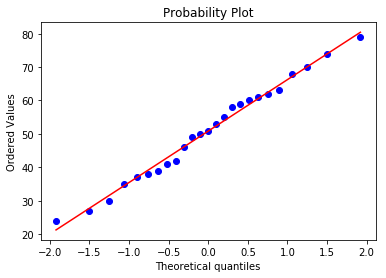

In [16]:
probplot(dados.Age, dist="norm", plot=plt)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1.9, 2. , 2.1, 2.1, 2.1, 2.2, 2.4, 2.8, 3. , 3.1, 3.1, 3.2, 3.3,
         3.5, 4.1, 4.2, 4.5, 4.6, 5.1, 5.3, 5.5, 6.2, 7. , 7.2, 7.8])),
 (1.7670914053586457, 3.9319999999999995, 0.9583690477971115))

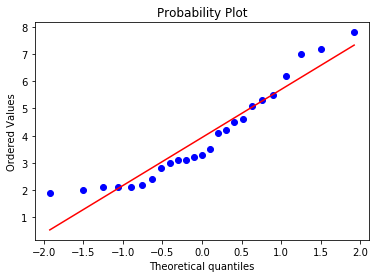

In [17]:
probplot(dados.Anxiety, dist="norm", plot=plt)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([24, 30, 30, 31, 31, 34, 38, 38, 40, 41, 42, 42, 42, 46, 48, 48, 50,
         50, 58, 60, 61, 62, 65, 66, 71], dtype=int64)),
 (13.391374200136715, 45.92, 0.9834243280646906))

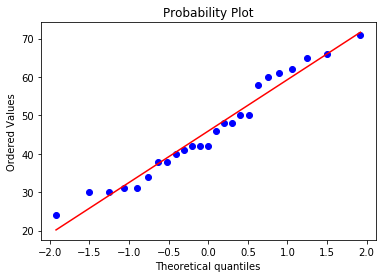

In [18]:
probplot(dados.Severity, dist="norm", plot=plt)

**d)**
Pr(Omnibus) = 0,122

Pr(JB) = 0,295  (não rejeito o H0)


   **Questão 3**

*(Montgomery 8-34)*

Um artigo no *Journal of Composite Materials* (Dec. 1989, V. 23, p. 1200) descreve o efeito de delaminação na frequência natural de vibração de vigas feitas de materiais compósitos laminados. Cinco de tais vigas foram submetidas a cargas mecânicas, e as frequências encontradas (em hertz) foram as seguintes:

`230.66,  233.05,  232.58, 229.48, 232.58`

Pede-se:

**a.** Verifique se podemos considerar a distribuição de frequências naturais normal. (Dica: *probplot*)

**b.** Crie um intervalo de confiança de 95% para a média das frequências naturais.




In [19]:
df = [230.66, 233.05, 232.58, 229.48, 232.58]

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([229.48, 230.66, 232.58, 232.58, 233.05])),
 (1.6428315647972442, 231.67000000000002, 0.9324814697235373))

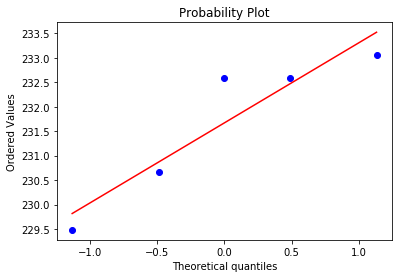

In [20]:
probplot(df, dist="norm", plot=plt)

In [24]:
media = np.mean(df)
alpha = 0.95
ci = stats.norm(alpha, media)
ci

**Questão 4**

*(Montgomery 8-35)*

A agência governamental de meteorologia do governo australiano forneceu os valores de precipitação média para o período 1983-2002 ( [http://www.bom.gov.au/climate/change/rain03.txt](http://www.bom.gov.au/climate/change/rain03.txt) )

    499.2, 555.2, 398.8, 391.9, 453.4, 459.8, 483.7, 417.6, 469.2,
    452.4, 499.3, 340.6, 522.8, 469.9, 527.2, 565.5, 584.1, 727.3,
    558.6, 338.6

Pede-se:

**a.** Pode-se considerar os níveis de precipitação como vindo de uma distribuição normal?

**b.** Sabemos $\sigma$ ? 

**c.** Construa um intervalo de confiança de $95\%$ para a precipitação média anual de chuvas.


((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([338.6, 340.6, 391.9, 398.8, 417.6, 452.4, 453.4, 459.8, 469.2,
         469.9, 483.7, 499.2, 499.3, 522.8, 527.2, 555.2, 558.6, 565.5,
         584.1, 727.3])),
 (92.41458721712567, 485.755, 0.9710178006682058))

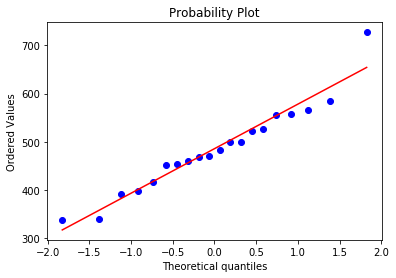

In [25]:
#a
dt = [499.2, 555.2, 398.8, 391.9, 453.4, 459.8, 483.7, 417.6, 469.2,
452.4, 499.3, 340.6, 522.8, 469.9, 527.2, 565.5, 584.1, 727.3,
558.6, 338.6]

probplot(dt, dist="norm", plot=plt)

É possivel considerar como uma distribuição normal, pois segundo o Probability Plot, os niveis de precipitação se aproximam de uma reta.

In [ ]:
#b
